# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#Observable trends
#higher latitudes tend to have lower Max Temps
#humidity and latitude don't seem to have correlation
#wind speed and latitude don't seem to have correlation


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) #was size 1500
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

temp= []
max_temp = []
humidity = []
wind_speed = []
clouds = []
city_lat = []
city_lon = []
country = []
thedate = []
i = 0
for city in cities:  
    try:
        response = requests.get(query_url + city).json()
        temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
        city_lat.append(response['coord']['lat'])
        city_lon.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        thedate.append(response['dt'])
        
        print(f"The city of {city} has a temp of {temp[i]} F. Importing {i+1} of {len(cities)}")
        i = i + 1
    except KeyError:
        print(f"Key Error moving on...")

print(f"There were {len(cities) - i} exceptions out of {len(cities)}.")  



The city of noumea has a temp of 64.4 F. Importing 1 of 628
max temp is 64.4
The city of jamestown has a temp of 62.17 F. Importing 2 of 628
max temp is 63
The city of barrow has a temp of 42.8 F. Importing 3 of 628
max temp is 42.8
The city of aitape has a temp of 78.6 F. Importing 4 of 628
max temp is 78.6
The city of sfantu gheorghe has a temp of 83.55 F. Importing 5 of 628
max temp is 84
The city of rikitea has a temp of 71.44 F. Importing 6 of 628
max temp is 71.44
The city of ancud has a temp of 34.21 F. Importing 7 of 628
max temp is 39
Key Error moving on...
The city of vaini has a temp of 71.6 F. Importing 8 of 628
max temp is 71.6
The city of chuy has a temp of 55.22 F. Importing 9 of 628
max temp is 55.22
The city of yeppoon has a temp of 60.8 F. Importing 10 of 628
max temp is 60.8
Key Error moving on...
The city of vanimo has a temp of 79.88 F. Importing 11 of 628
max temp is 79.88
The city of narsaq has a temp of 57.2 F. Importing 12 of 628
max temp is 57.2
The city of ma

The city of afyonkarahisar has a temp of 86 F. Importing 100 of 628
max temp is 86
The city of bluff has a temp of 46.36 F. Importing 101 of 628
max temp is 46.36
The city of vicuna has a temp of 36 F. Importing 102 of 628
max temp is 36
The city of kaitangata has a temp of 45 F. Importing 103 of 628
max temp is 45
The city of victoria has a temp of 79.65 F. Importing 104 of 628
max temp is 80.01
The city of east london has a temp of 60.8 F. Importing 105 of 628
max temp is 60.8
The city of college place has a temp of 76.17 F. Importing 106 of 628
max temp is 80.6
The city of atuona has a temp of 78.4 F. Importing 107 of 628
max temp is 78.4
The city of los llanos de aridane has a temp of 77.77 F. Importing 108 of 628
max temp is 80.6
The city of thompson has a temp of 51.8 F. Importing 109 of 628
max temp is 51.8
The city of peravurani has a temp of 84.09 F. Importing 110 of 628
max temp is 84.09
The city of timbiqui has a temp of 75.29 F. Importing 111 of 628
max temp is 75.29
Key Er

The city of macas has a temp of 72.34 F. Importing 197 of 628
max temp is 72.34
The city of caravelas has a temp of 79.5 F. Importing 198 of 628
max temp is 79.5
The city of cabo san lucas has a temp of 78.51 F. Importing 199 of 628
max temp is 79
The city of del rio has a temp of 71.6 F. Importing 200 of 628
max temp is 71.6
Key Error moving on...
The city of kaabong has a temp of 74.01 F. Importing 201 of 628
max temp is 74.01
The city of constitucion has a temp of 49.19 F. Importing 202 of 628
max temp is 49.19
The city of zhanakorgan has a temp of 81.07 F. Importing 203 of 628
max temp is 81.07
The city of bonthe has a temp of 80.01 F. Importing 204 of 628
max temp is 80.01
The city of bull savanna has a temp of 79.74 F. Importing 205 of 628
max temp is 79.74
The city of lasa has a temp of 74.79 F. Importing 206 of 628
max temp is 77
The city of coquimbo has a temp of 51.8 F. Importing 207 of 628
max temp is 51.8
The city of taoudenni has a temp of 116.69 F. Importing 208 of 628
ma

The city of ayame has a temp of 78.1 F. Importing 295 of 628
max temp is 78.1
The city of broken hill has a temp of 59 F. Importing 296 of 628
max temp is 59
The city of rundu has a temp of 84.13 F. Importing 297 of 628
max temp is 84.13
The city of alta floresta has a temp of 92.97 F. Importing 298 of 628
max temp is 92.97
The city of khatanga has a temp of 60.46 F. Importing 299 of 628
max temp is 60.46
The city of yar-sale has a temp of 60.19 F. Importing 300 of 628
max temp is 60.19
The city of dehui has a temp of 71.6 F. Importing 301 of 628
max temp is 71.6
The city of valparaiso has a temp of 44.6 F. Importing 302 of 628
max temp is 44.6
The city of tarko-sale has a temp of 68.41 F. Importing 303 of 628
max temp is 68.41
Key Error moving on...
The city of baracoa has a temp of 83.57 F. Importing 304 of 628
max temp is 83.57
The city of anadyr has a temp of 37.4 F. Importing 305 of 628
max temp is 37.4
The city of banda aceh has a temp of 81.73 F. Importing 306 of 628
max temp is

The city of dhidhdhoo has a temp of 83.1 F. Importing 394 of 628
max temp is 83.1
The city of kavaratti has a temp of 82.09 F. Importing 395 of 628
max temp is 82.09
The city of sajanan has a temp of 87.57 F. Importing 396 of 628
max temp is 91.4
The city of luau has a temp of 98.65 F. Importing 397 of 628
max temp is 98.65
The city of atar has a temp of 96.8 F. Importing 398 of 628
max temp is 96.8
The city of ossora has a temp of 50.9 F. Importing 399 of 628
max temp is 50.9
The city of aasiaat has a temp of 45.81 F. Importing 400 of 628
max temp is 45.81
The city of phalaborwa has a temp of 82.4 F. Importing 401 of 628
max temp is 82.4
The city of izumo has a temp of 78.8 F. Importing 402 of 628
max temp is 78.8
The city of cardoso has a temp of 79.74 F. Importing 403 of 628
max temp is 79.74
The city of rantauprapat has a temp of 76.96 F. Importing 404 of 628
max temp is 76.96
The city of betanzos has a temp of 75.2 F. Importing 405 of 628
max temp is 75.2
The city of skjervoy has 

The city of ust-nera has a temp of 43.11 F. Importing 492 of 628
max temp is 43.11
The city of mackay has a temp of 62.53 F. Importing 493 of 628
max temp is 66.2
The city of kochubey has a temp of 86.38 F. Importing 494 of 628
max temp is 86.38
The city of arvika has a temp of 80.13 F. Importing 495 of 628
max temp is 81
The city of havelian has a temp of 91.13 F. Importing 496 of 628
max temp is 91.4
The city of alacranes has a temp of 75.2 F. Importing 497 of 628
max temp is 75.2
The city of ketchikan has a temp of 55.4 F. Importing 498 of 628
max temp is 55.4
The city of carutapera has a temp of 85.1 F. Importing 499 of 628
max temp is 85.1
The city of san policarpo has a temp of 78.66 F. Importing 500 of 628
max temp is 78.66
The city of icod de los vinos has a temp of 78.91 F. Importing 501 of 628
max temp is 82
The city of alenquer has a temp of 84.2 F. Importing 502 of 628
max temp is 84.2
Key Error moving on...
The city of natchez has a temp of 68.97 F. Importing 503 of 628
ma

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
df_columns = ["City","Lat","Lon","Max Temp","Humidity","Cloudiness","Wind Speed","Country","Date"]
for i,dates in enumerate(thedate):
    thedate[i] = pd.Timestamp.date(pd.to_datetime(thedate[i]))


cities_df = pd.DataFrame(cities)
city_lat_df = pd.DataFrame(city_lat)
city_lon_df = pd.DataFrame(city_lon)
max_temp_df = pd.DataFrame(max_temp)
humidity_df = pd.DataFrame(humidity)
clouds_df = pd.DataFrame(clouds)
wind_speed_df = pd.DataFrame(wind_speed)
country_df = pd.DataFrame(country)
thedate_df = pd.DataFrame(thedate)

merged = cities_df.merge(city_lat_df, left_index = True, right_index = True)
merged = merged.merge(city_lon_df, left_index = True, right_index = True)
merged = merged.merge(max_temp_df, left_index = True, right_index = True)
merged = merged.merge(humidity_df, left_index = True, right_index = True)
merged = merged.merge(clouds_df, left_index = True, right_index = True)
merged = merged.merge(wind_speed_df, left_index = True, right_index = True)
merged = merged.merge(country_df, left_index = True, right_index = True)
merged = merged.merge(thedate_df, left_index = True, right_index = True)

merged.columns = df_columns

merged.to_csv(output_data_file)


In [5]:
t = merged.loc[merged["Humidity"] > 100]
t


,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#NA

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv

#USING CSV DATE FROM HERE ON DUE TO RELOADS AND API RESTRICTIONS
file_to_load = "cities.csv"
data = pd.read_csv(file_to_load,low_memory=False)
data

,Unnamed: 0,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,noumea,-22.28,166.46,64.40,82,75,5.44,NC,1970-01-01
1,1,jamestown,42.10,-79.24,63.00,100,40,3.11,US,1970-01-01
2,2,barrow,71.29,-156.79,42.80,93,90,14.99,US,1970-01-01
3,3,aitape,-3.14,142.35,78.60,83,1,6.85,PG,1970-01-01
4,4,sfantu gheorghe,45.87,25.78,84.00,42,100,1.99,RO,1970-01-01
...,...,...,...,...,...,...,...,...,...,...
568,568,pacific grove,12.48,-16.55,87.80,84,40,4.70,SN,1970-01-01
569,569,teya,32.19,-115.00,95.00,40,1,5.82,MX,1970-01-01
570,570,sokoto,13.64,16.49,94.91,39,100,9.62,TD,1970-01-01
571,571,makakilo city,52.11,-101.27,65.10,76,70,3.51,CA,1970-01-01


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

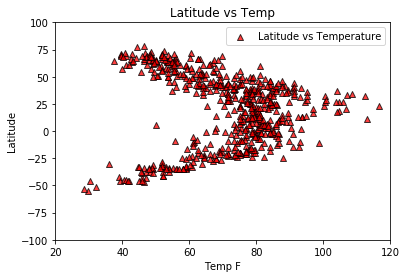

In [10]:

y_axis = data["Lat"]
x_axis = data["Max Temp"]


plt.title("Latitude vs Temp")
plt.ylabel("Latitude")
plt.xlabel("Temp F")

plt.ylim(-100,100)
plt.xlim(20,120)
plt.scatter(x_axis, y_axis, marker="^", facecolors="red", edgecolors="black",  alpha=0.75, label="Latitude vs Temperature")
plt.legend()
plt.plot()
plt.show()

## Latitude vs. Humidity Plot

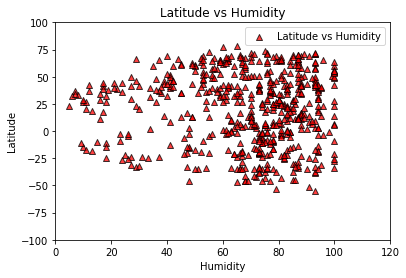

In [11]:

y_axis = data["Lat"]
x_axis = data["Humidity"]


plt.title("Latitude vs Humidity")
plt.ylabel("Latitude")
plt.xlabel("Humidity")

plt.ylim(-100,100)
plt.xlim(0,120)
plt.scatter(x_axis, y_axis, marker="^", facecolors="red", edgecolors="black",  alpha=0.75, label="Latitude vs Humidity")
plt.legend()
plt.plot()
plt.show()

## Latitude vs. Cloudiness Plot

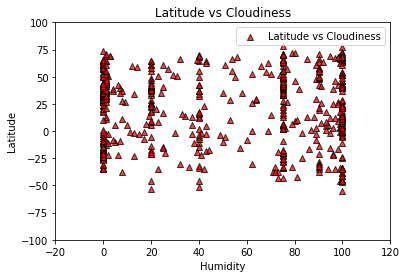

In [12]:
y_axis = data["Lat"]
x_axis = data["Cloudiness"]


plt.title("Latitude vs Cloudiness")
plt.ylabel("Latitude")
plt.xlabel("Humidity")

plt.ylim(-100,100)
plt.xlim(-20,120)
plt.scatter(x_axis, y_axis, marker="^", facecolors="red", edgecolors="black",  alpha=0.75, label="Latitude vs Cloudiness")
plt.legend()
plt.plot()
plt.show()

## Latitude vs. Wind Speed Plot

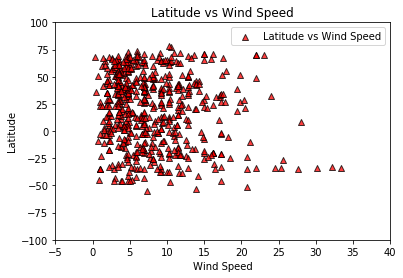

In [13]:
y_axis = data["Lat"]
x_axis = data["Wind Speed"]


plt.title("Latitude vs Wind Speed")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed")

plt.ylim(-100,100)
plt.xlim(-5,40)
plt.scatter(x_axis, y_axis, marker="^", facecolors="red", edgecolors="black",  alpha=0.75, label="Latitude vs Wind Speed")
plt.legend()
plt.plot()
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

northern = data.loc[data["Lat"]>=0]
southern = data.loc[data["Lat"]<0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

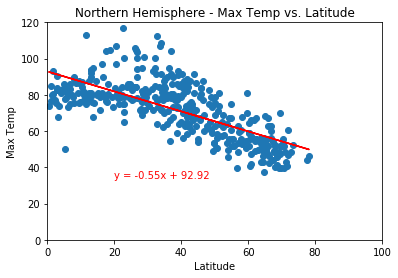

In [16]:

# Calculate the correlation coefficient 
y_axis = northern["Max Temp"]
x_axis = northern["Lat"]

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Northern Hemisphere - Max Temp vs. Latitude")

plt.annotate(line_eq,(20,34),fontsize=10,color="red")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlim(0,100)
plt.ylim(0,120)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

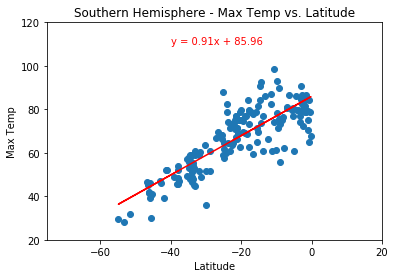

In [17]:

# Calculate the correlation coefficient 
y_axis = southern["Max Temp"]
x_axis = southern["Lat"]

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Southern Hemisphere - Max Temp vs. Latitude")

plt.annotate(line_eq,(-40,110),fontsize=10,color="red")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlim(-75,20)
plt.ylim(20,120)
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

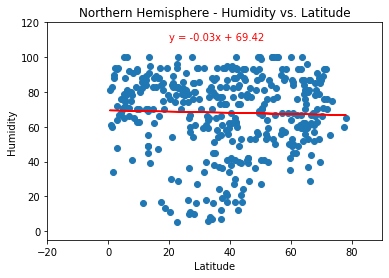

In [18]:

# Calculate the correlation coefficient 
y_axis = northern["Humidity"]
x_axis = northern["Lat"]

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Northern Hemisphere - Humidity vs. Latitude")

plt.annotate(line_eq,(20,110),fontsize=10,color="red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlim(-20,90)
plt.ylim(-5,120)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

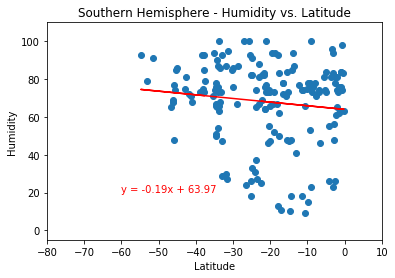

In [19]:

# Calculate the correlation coefficient 
y_axis = southern["Humidity"]
x_axis = southern["Lat"]

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Southern Hemisphere - Humidity vs. Latitude")

plt.annotate(line_eq,(-60,20),fontsize=10,color="red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlim(-80,10)
plt.ylim(-5,110)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

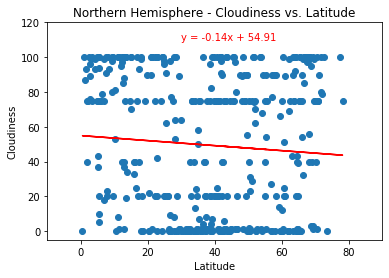

In [20]:

# Calculate the correlation coefficient 
y_axis = northern["Cloudiness"]
x_axis = northern["Lat"]

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")

plt.annotate(line_eq,(30,110),fontsize=10,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlim(-10,90)
plt.ylim(-5,120)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

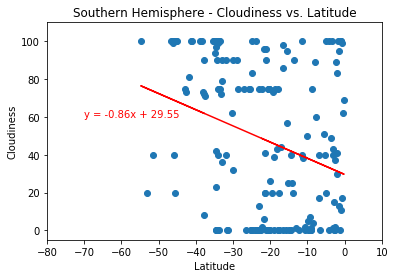

In [21]:

# Calculate the correlation coefficient 
y_axis = southern["Cloudiness"]
x_axis = southern["Lat"]

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")

plt.annotate(line_eq,(-70,60),fontsize=10,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlim(-80,10)
plt.ylim(-5,110)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

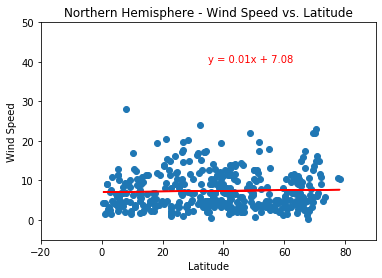

In [22]:

# Calculate the correlation coefficient 
y_axis = northern["Wind Speed"]
x_axis = northern["Lat"]

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")

plt.annotate(line_eq,(35,40),fontsize=10,color="red")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlim(-20,90)
plt.ylim(-5,50)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

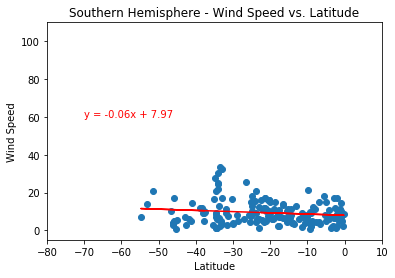

In [23]:

# Calculate the correlation coefficient 
y_axis = southern["Wind Speed"]
x_axis = southern["Lat"]

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")

plt.annotate(line_eq,(-70,60),fontsize=10,color="red")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlim(-80,10)
plt.ylim(-5,110)
plt.show()